In [10]:
import annotation_analysis as an
from Data import symbol_graph as sg
from importlib import reload
import text_encoding
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
reload(an); reload(sg)

<module 'Data.symbol_graph' from 'c:\\Users\\jf22881\\Documents\\GitHub\\context-art-classification\\Data\\symbol_graph.py'>

Symbol mat: (19244, 225) Set: train Symbol names: 225
Target density: [0.01060070671378092, 0.004313032633548119, 0.0035335689045936395]
Symbol mat: (1069, 225) Set: val Symbol names: 225
Target density: [0.006548175865294668, 0.0037418147801683817, 0.0009354536950420954]
Symbol mat: (1069, 225) Set: test Symbol names: 225
Target density: [0.006548175865294668, 0.0037418147801683817, 0.002806361085126286]


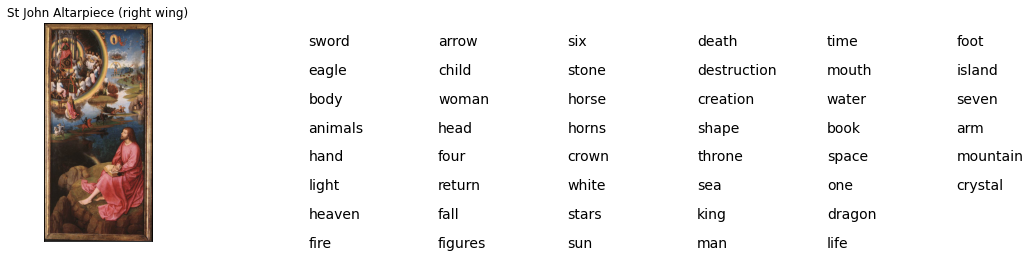

In [43]:
import params
    

from attributes import load_att_class
from dataloader_sym import ArtDatasetSym

args_dict = params.get_parser()
reload(an)
args_dict.dir_data = 'Data'
args_dict.mode = 'train'
args_dict.vocab_type = 'type2ind.csv'
args_dict.vocab_school = 'school2ind.csv'
args_dict.vocab_time = 'time2ind.csv'
args_dict.vocab_author = 'author2ind.csv'
args_dict.embedds = 'tfidf'
args_dict.dir_dataset = r'C:\Users\jf22881\Documents\SemArt'
args_dict.csvtrain = 'semart_train.csv'
args_dict.csvval = 'semart_val.csv'
args_dict.csvtest = 'semart_test.csv'
args_dict.dir_images = 'Images'
args_dict.targets = [10, 20 ,30]

#type2idx, school2idx, time2idx, author2idx = load_att_class(args_dict)
semart_train_loader = ArtDatasetSym(args_dict, set='train', symbol_detect=args_dict.targets)
semart_val_loader = ArtDatasetSym(args_dict, set='val', symbol_detect=args_dict.targets, canon_list=semart_train_loader.symbols_names) 
semart_test_loader = ArtDatasetSym(args_dict, set='test', symbol_detect=args_dict.targets, canon_list=semart_train_loader.symbols_names) 

semart_Gallery = an.Gallery(semart_train_loader.symbols_names, semart_train_loader.paintings_names, semart_train_loader.symbol_context, args_dict.dir_dataset)
val_Gallery = an.Gallery(semart_val_loader.symbols_names, semart_val_loader.paintings_names, semart_val_loader.symbol_context, args_dict.dir_dataset)
test_Gallery = an.Gallery(semart_test_loader.symbols_names, semart_test_loader.paintings_names, semart_test_loader.symbol_context, args_dict.dir_dataset)

semart_Gallery.vis_painting_symbols(15579, True)


In [49]:
np.mean(semart_Gallery.symbol_context[:, 193])

0.07940137185616296

In [50]:
semart_Gallery.ratio_symbol(193)

0.07940137185616296

In [126]:
semart_Gallery = an.Gallery(symbols_names, paintings_names, symbol_context, an.args_dict.dir_dataset)

225 225


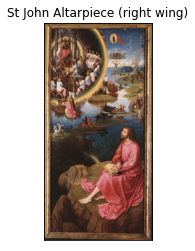

In [19]:
semart_Gallery.vis_painting_symbols(15579, True)

In [5]:
semart_Gallery.density_symbolic_paintings(10)

array([15579, 17716,  3014,  2378, 13041, 11309, 10818,  9605, 14981,
        2436], dtype=int64)

225 225


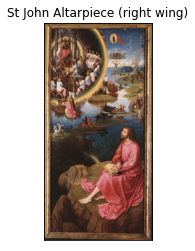

In [6]:
semart_Gallery.vis_painting_symbols(15579, True)

In [111]:
semart_Gallery.symbol_context.sum(axis=1).argmax()

15579